## Mentall Illness Prevalence
In this notebook we will use the "Our World in Data" Mental Illness Prevalence dataset, which can be accessed [here](https://ourworldindata.org/grapher/mental-illnesses-prevalence). This dataset has the estimated share of people with each mental illness in a given year from 1990 to 2019, whether or not they were diagnosed, based on representative surveys, medical data and statistical modeling.

The included illnesses are Schizophrenia, Depressive disorders, Anxiety disorders, Bipolar disorder, and Eating disorders. We select the five countries with the highest variance across the years with respect to each of the above mentioned illnesses and plot a stacked bar plot for each of these. We make 30 plots for each year to see the change.

We also make individual plots of each country with only the highest variance illness to see this change.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
prevalence_DF = pd.read_csv("mental-illnesses-prevalence.csv")
selected_columns = ['Entity', 'Code', 'Year', 'Schizophrenia', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']
prevalence_DF.columns = selected_columns
prevalence_DF

,Entity,Code,Year,Schizophrenia,Depressive disorders,Anxiety disorders,Bipolar disorder,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [5]:
# 
stds = []
for count in range(0, len(prevalence_DF)//30):
    sch = prevalence_DF[count*30: (count+1)*30]['Schizophrenia'].std(axis=0)
    dep = prevalence_DF[count*30: (count+1)*30]['Depressive disorders'].std(axis=0)
    anx = prevalence_DF[count*30: (count+1)*30]['Anxiety disorders'].std(axis=0)
    bip = prevalence_DF[count*30: (count+1)*30]['Bipolar disorder'].std(axis=0)
    eat = prevalence_DF[count*30: (count+1)*30]['Eating disorders'].std(axis=0)
    stds.append([sch, dep, anx, bip, eat])
stds = np.array(stds)
stds

array([[2.65603672e-03, 2.34433792e-02, 5.86690469e-02, 7.96086060e-04,
        9.80649851e-03],
       [5.84177971e-04, 7.33434607e-02, 3.46738618e-02, 1.70712162e-03,
        5.24606894e-03],
       [2.58781756e-03, 2.93612936e-02, 5.45197863e-02, 3.99195070e-04,
        1.33542317e-02],
       ...,
       [1.60080416e-03, 1.61895964e-02, 1.00733625e-02, 2.81977010e-04,
        5.67284028e-03],
       [1.77253264e-03, 4.63902925e-02, 7.93890269e-02, 3.87625118e-05,
        7.52563647e-03],
       [3.01803924e-03, 3.60843855e-02, 1.93680224e-02, 6.18622201e-05,
        7.56193780e-03]])

In [6]:
# Extracting the needed data. The prevalence of Schizophrenia in Equatorial Guinea, Depressive Disorders in Cuba, Anxiety Disorders in Brazil, 
# Bipolar disorder in Argentina, and Eating disorders in Australia
selected_countries = []
for num_country in np.argmax(stds, axis=0):
    as_object = prevalence_DF[num_country*30: (num_country)*30+1]["Entity"]
    selected_countries.append(np.array(as_object)[0])
selected_countries

['Equatorial Guinea', 'Cuba', 'Brazil', 'Argentina', 'Australia']

/home/blancocd/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


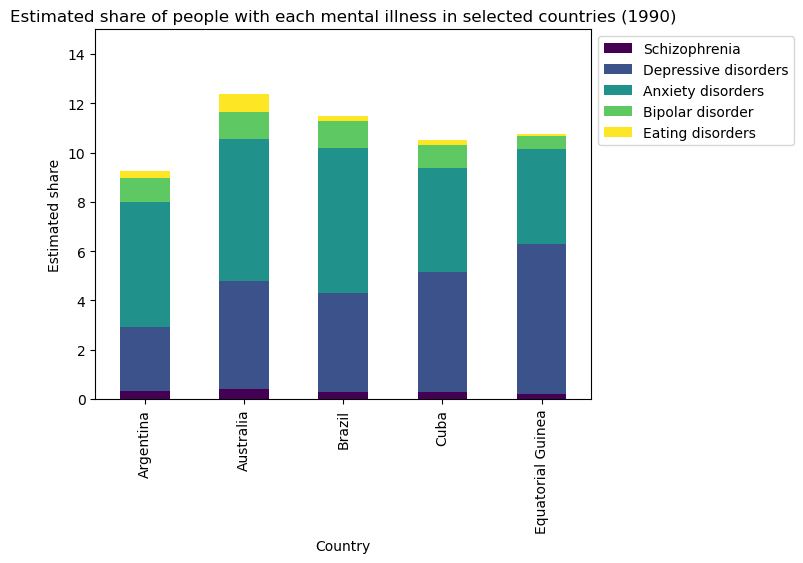

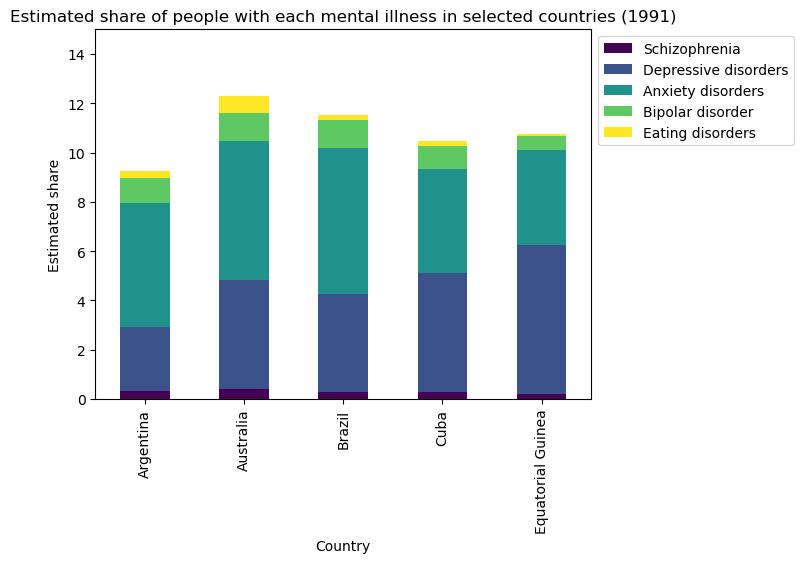

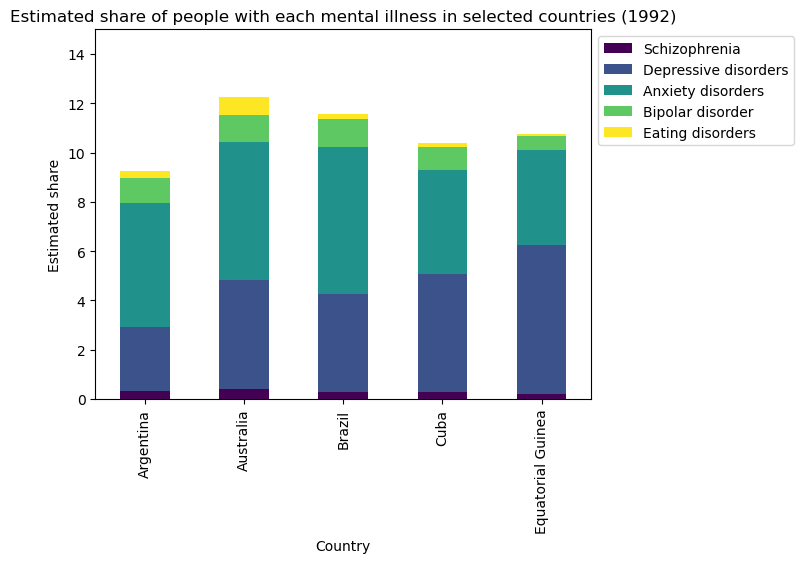

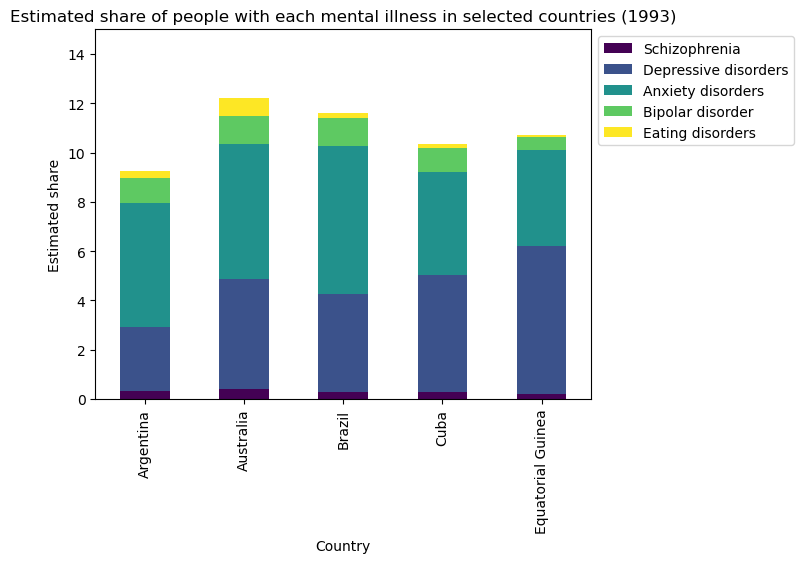

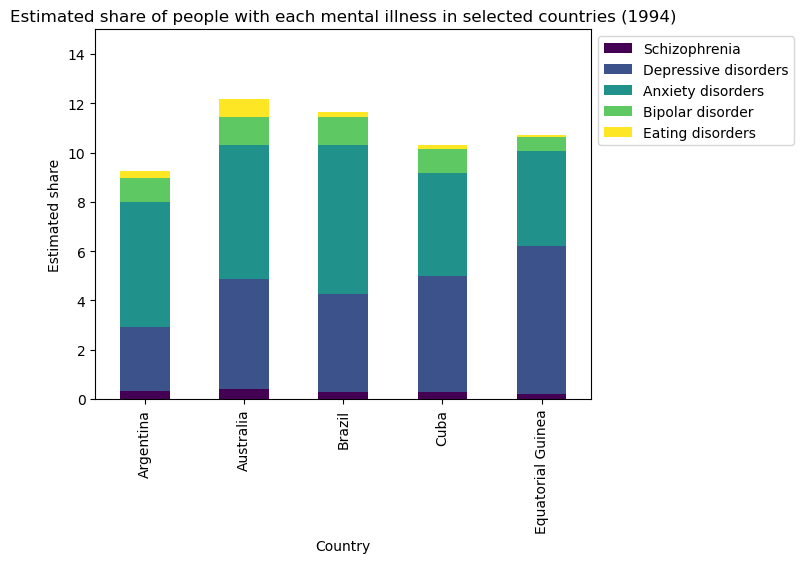

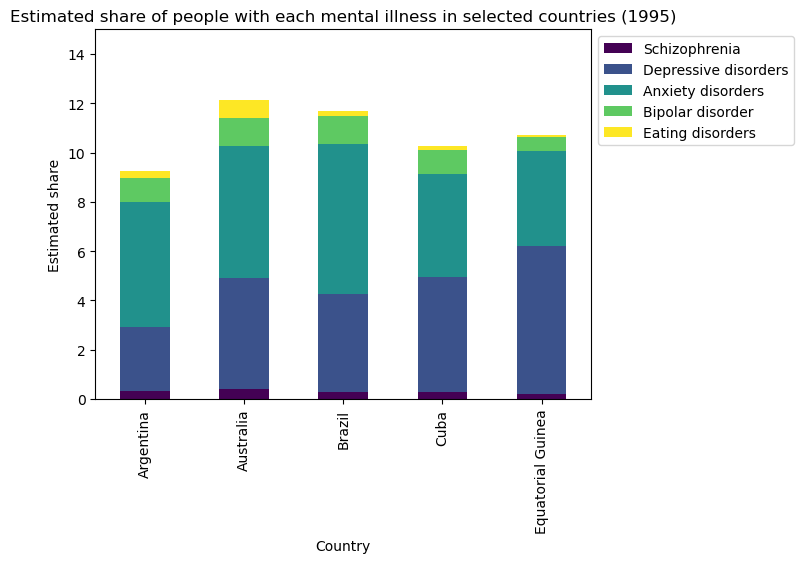

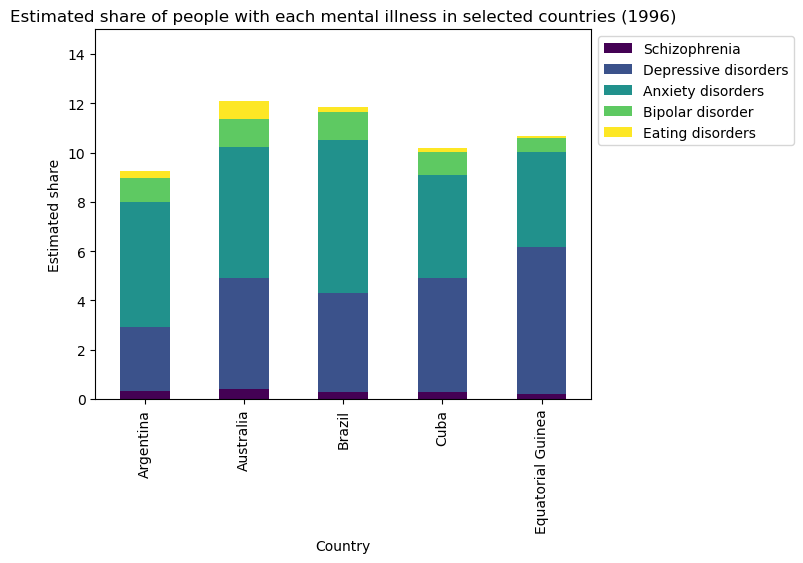

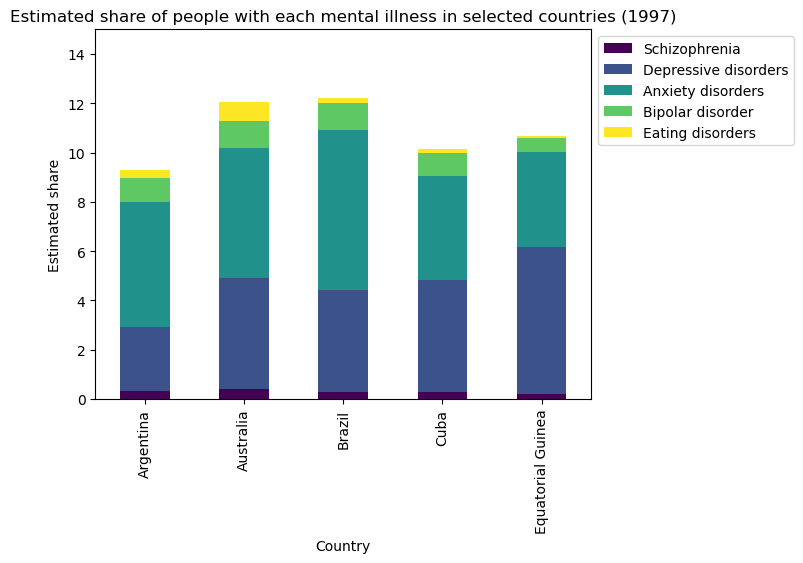

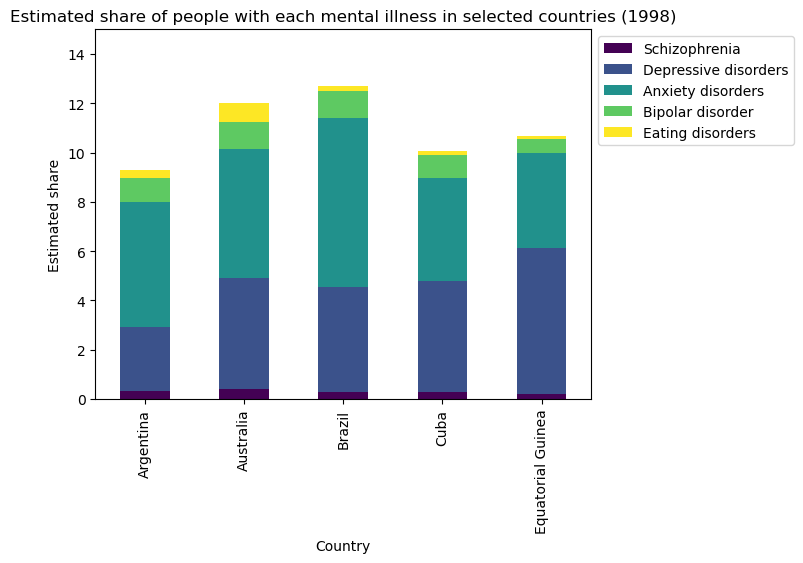

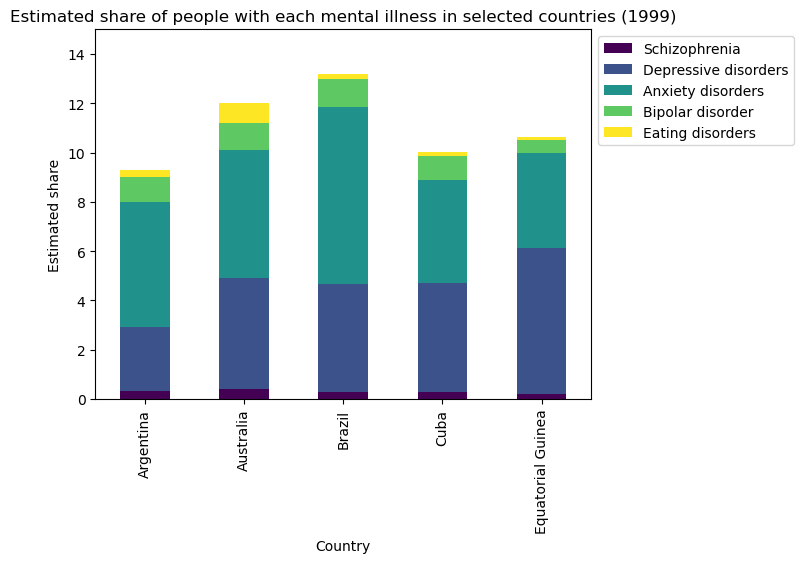

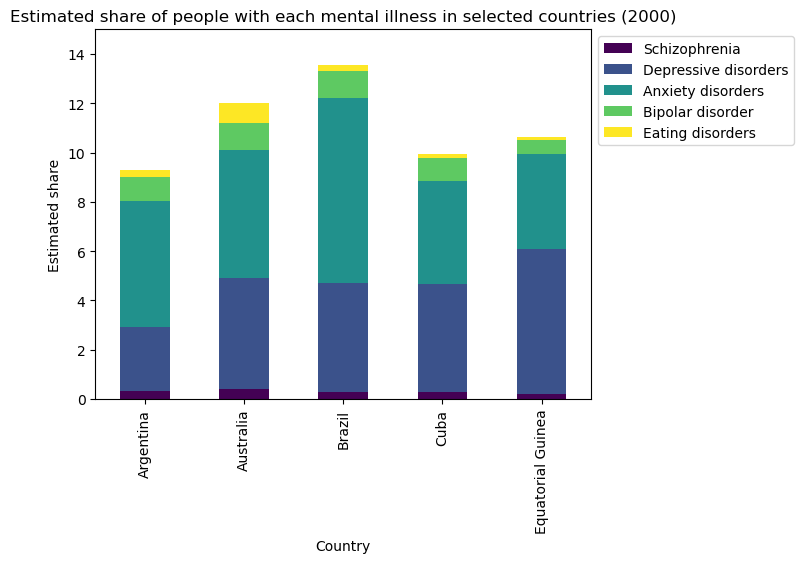

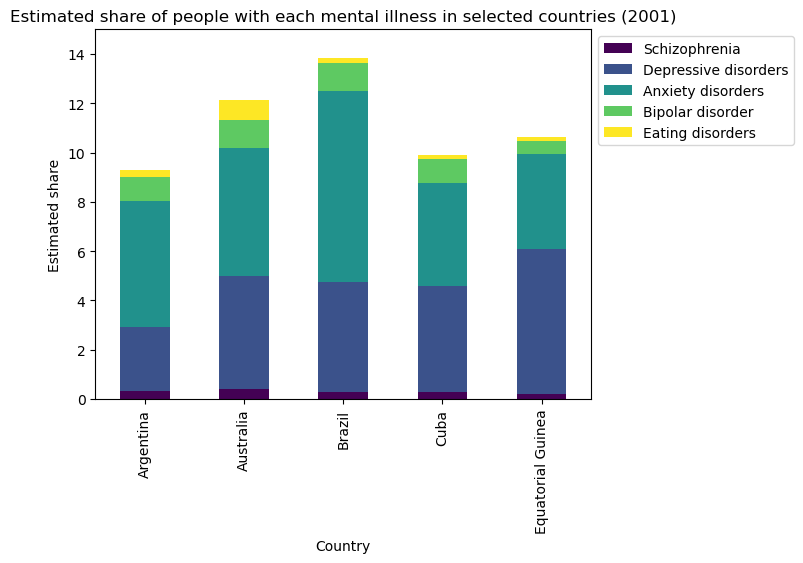

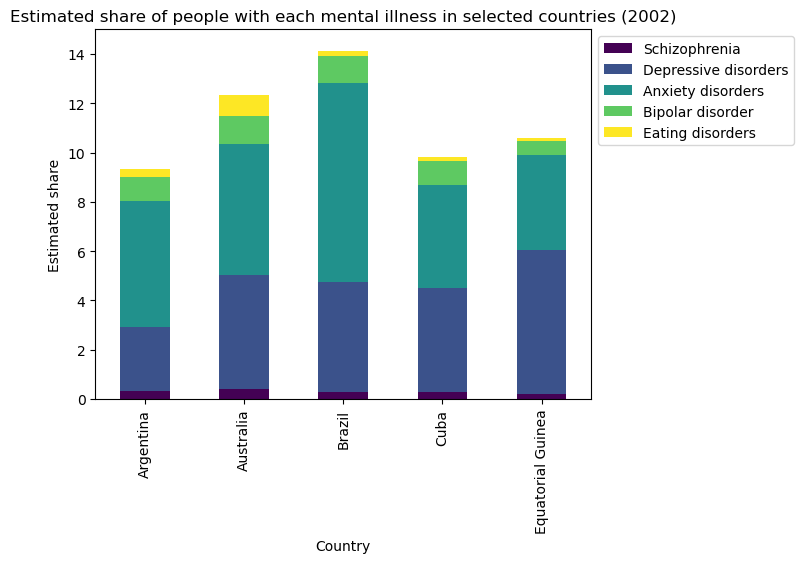

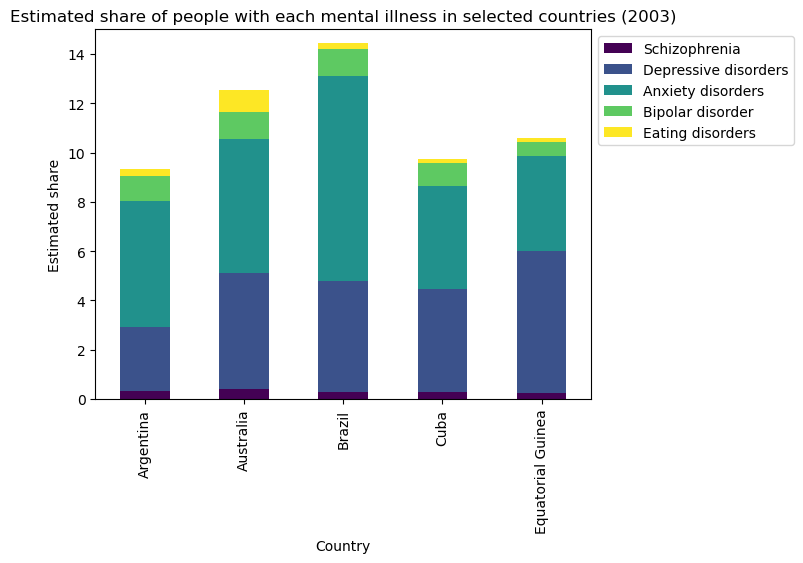

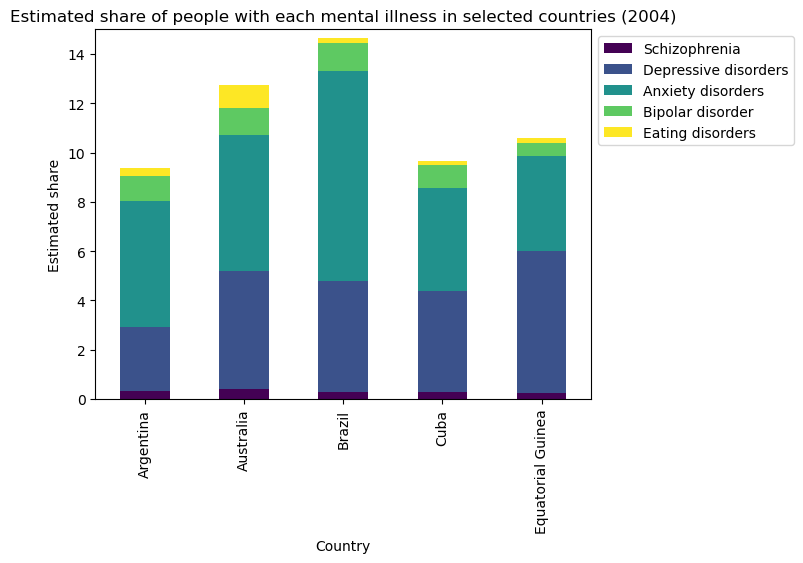

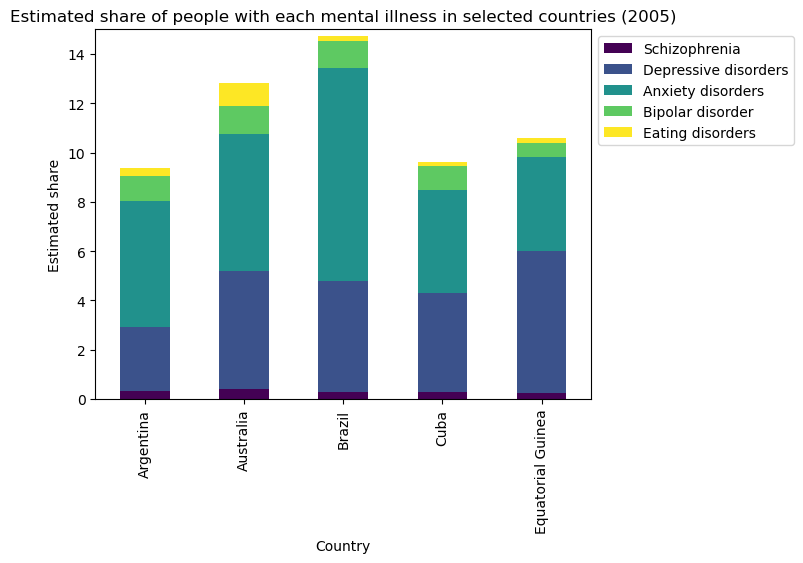

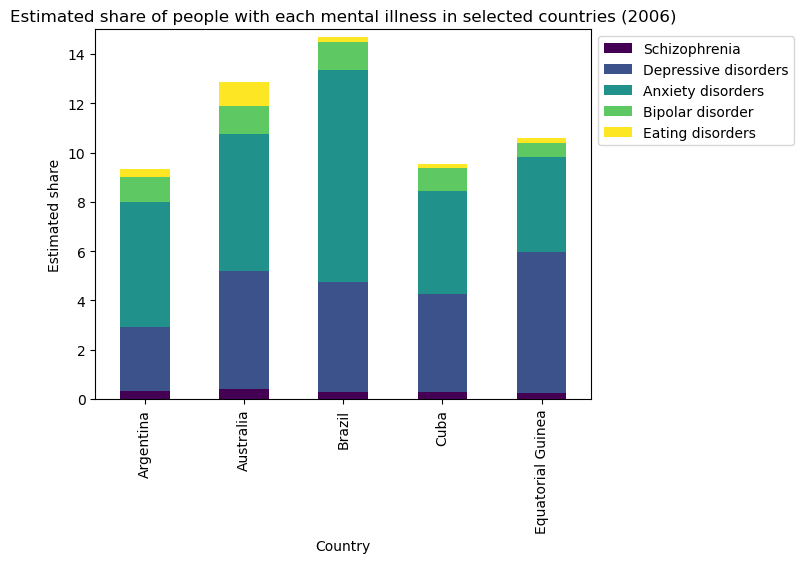

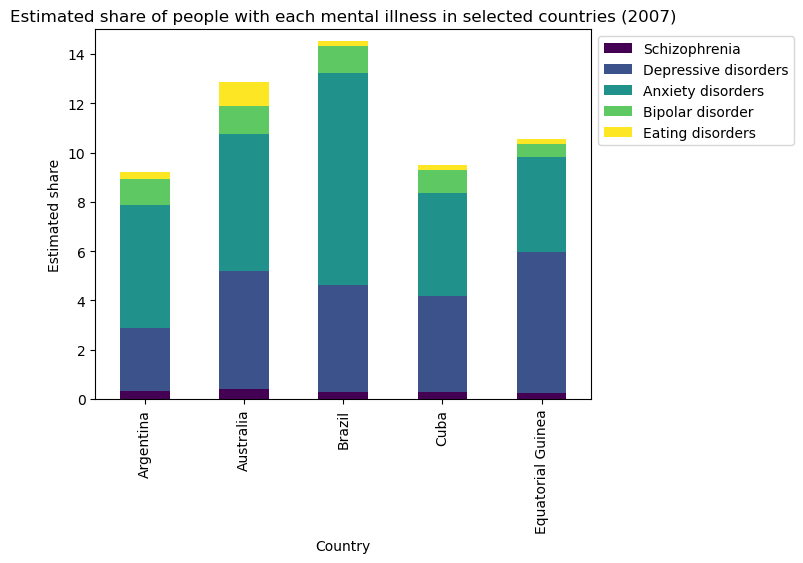

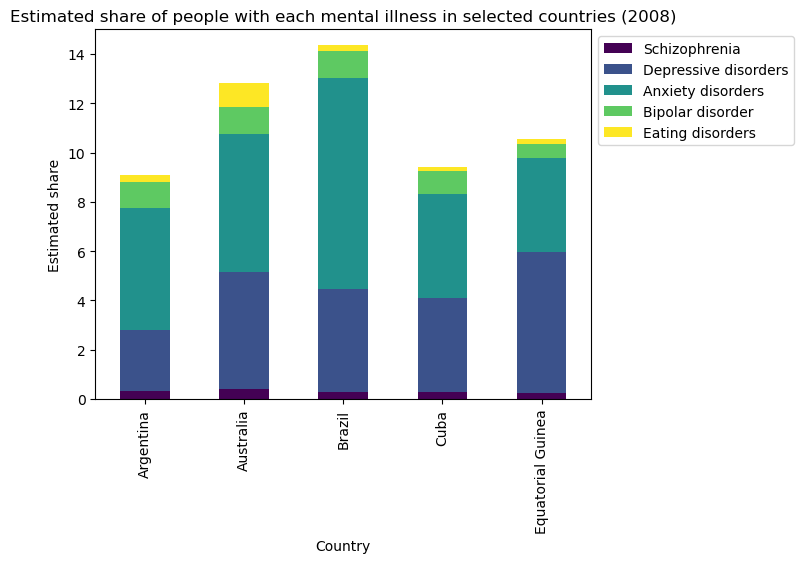

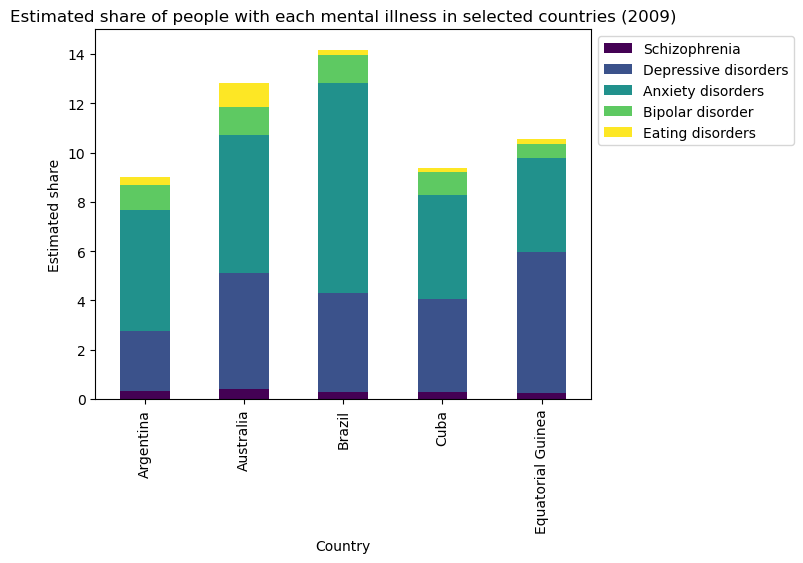

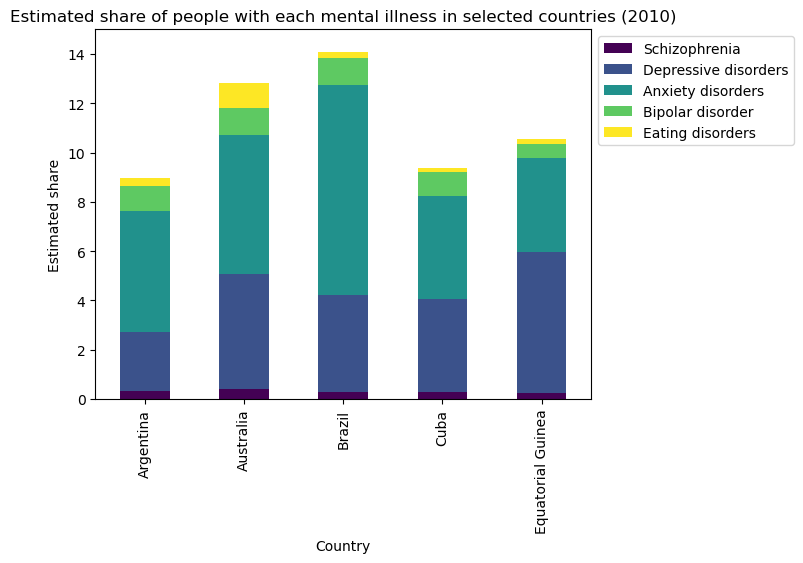

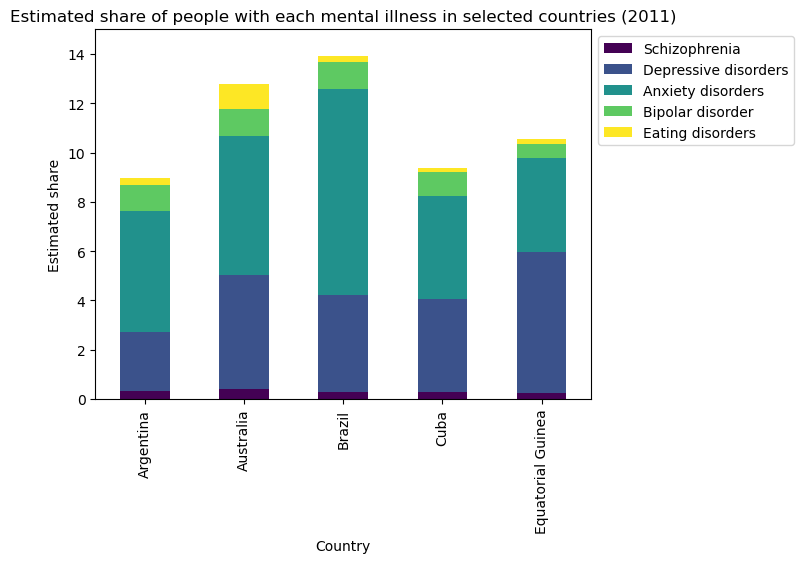

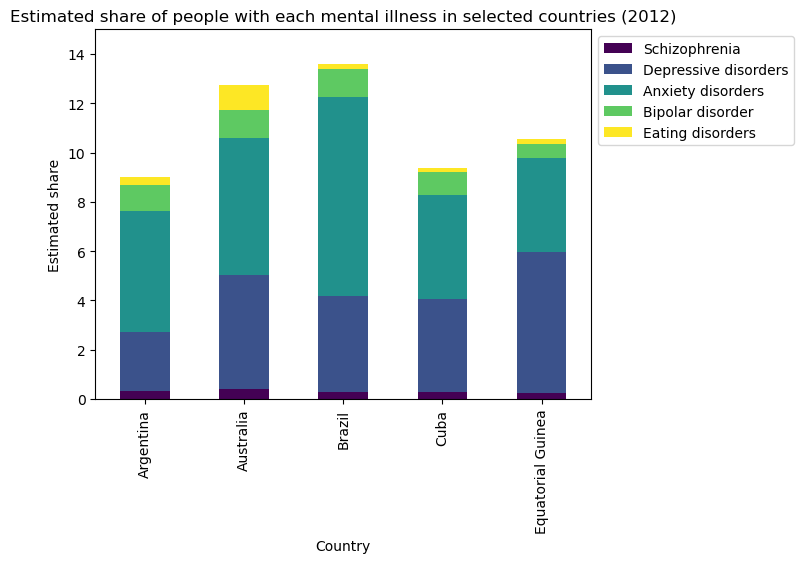

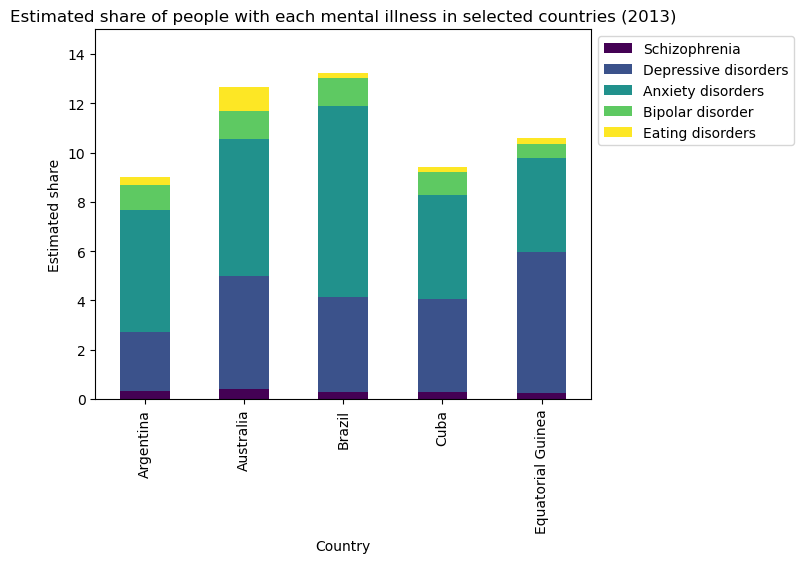

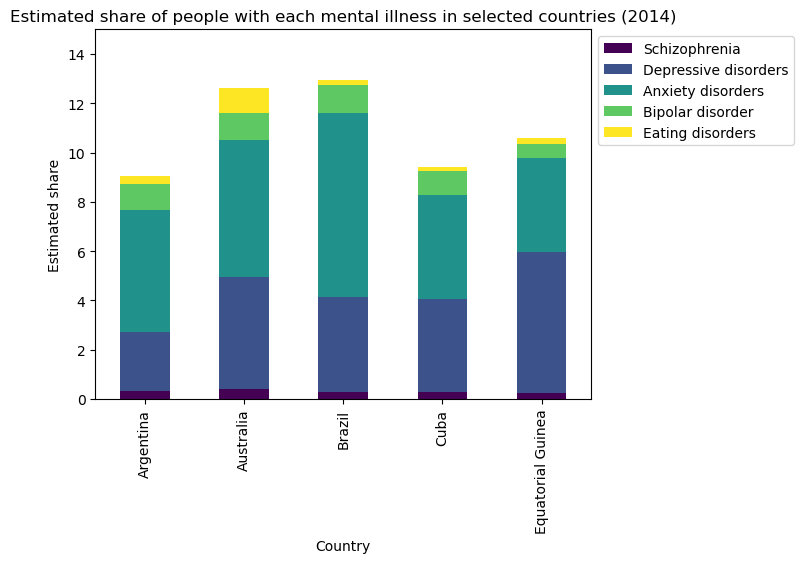

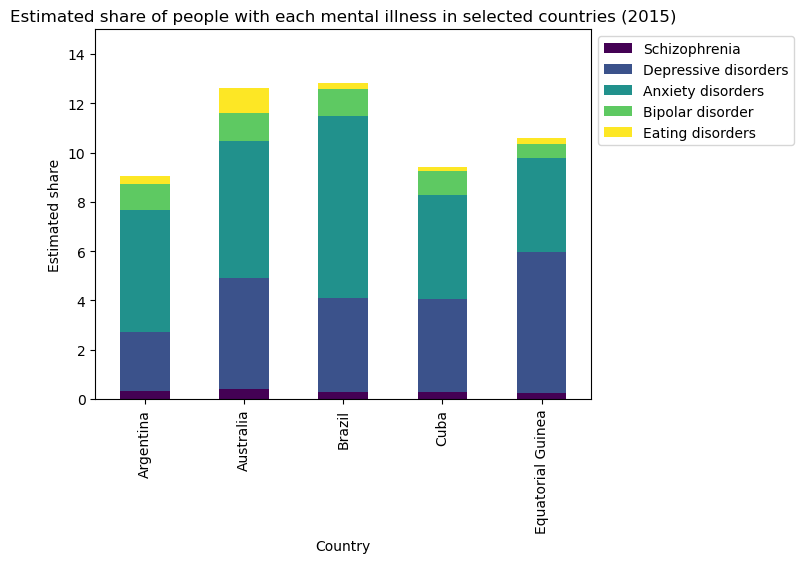

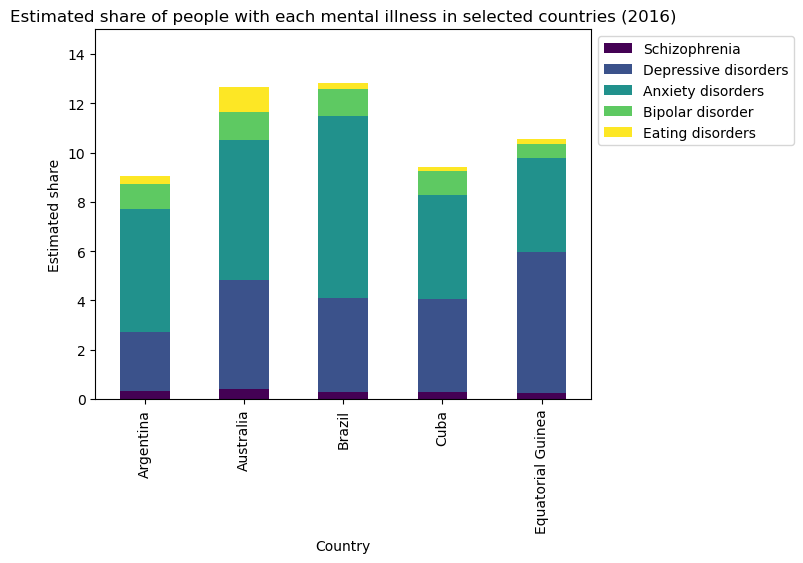

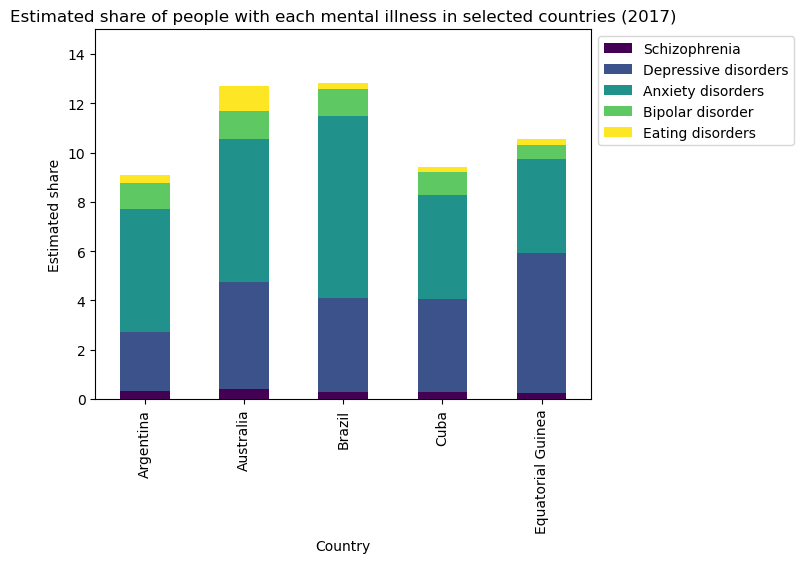

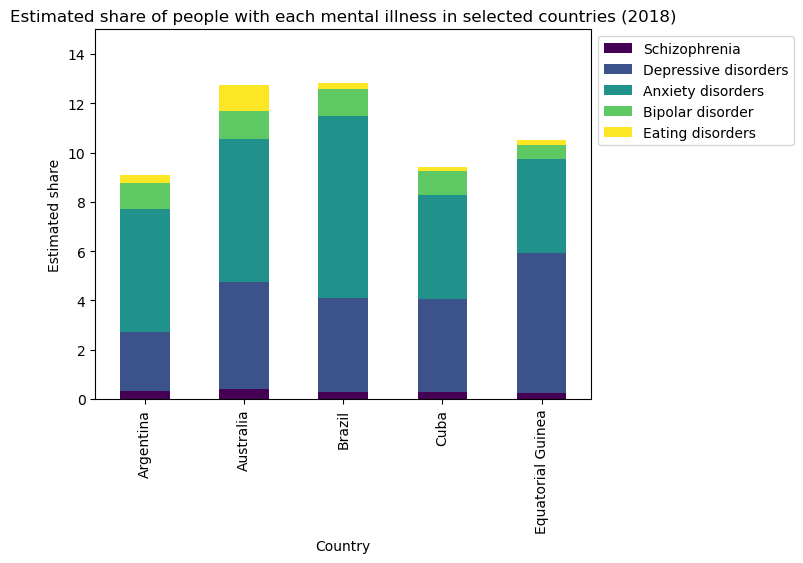

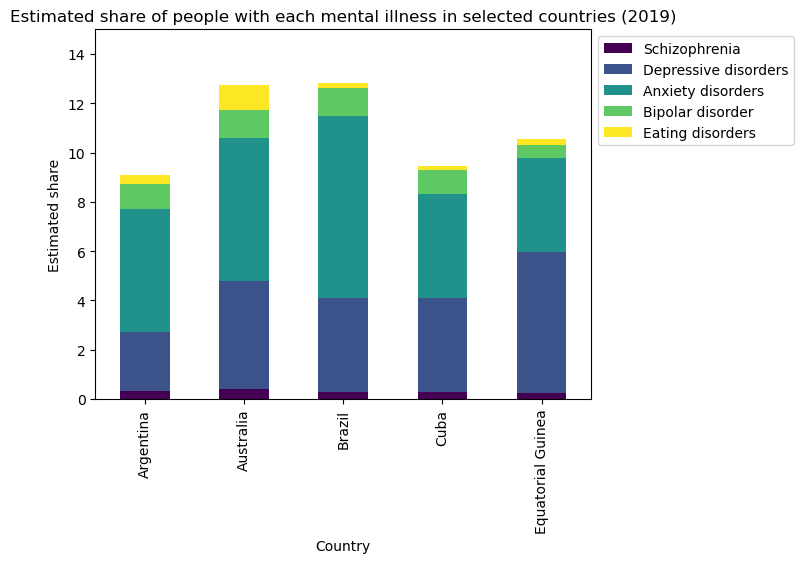

In [7]:
for year in range(1990,2020):
    selected_columns = ['Schizophrenia', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']

    # Filter data for selected countries
    filtered_data = prevalence_DF[prevalence_DF['Entity'].isin(selected_countries)  & (prevalence_DF['Year'] == year) ]

    # Group by 'Entity' (country) and calculate the mean percentage for each disorder
    grouped_data = filtered_data.groupby('Entity')[selected_columns].mean()

    # Normalize the data to get percentages
    grouped_data_percentage = grouped_data

    # Plotting stacked bar chart
    grouped_data_percentage.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Estimated share of people with each mental illness in selected countries ('+str(year)+')')
    plt.xlabel('Country')
    plt.ylabel('Estimated share')
    plt.ylim(0, 15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig("prevalence_"+str(year)+".png", dpi=300, bbox_inches='tight')

In [8]:
years = range(1990,2020)
selected_columns = ['Schizophrenia', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']
for i in range(len(selected_columns)):
    illness = selected_columns[i]
    country = selected_countries[i]
    
    # Group by 'Entity' (country) and calculate the mean percentage for each disorder
    filtered_data = prevalence_DF[prevalence_DF['Entity'].isin([country]) ][illness]
    plt.plot(years, filtered_data)
    plt.title('Estimated share of people with '+illness+' in '+country+'('+str(year)+')')
    plt.savefig(country+"_"+illness+"_"+str(year)+".png", dpi=300, bbox_inches='tight')
    plt.close('all')